In [51]:
import sklearn.datasets
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
import pandas as pd

In [52]:
dataset = sklearn.datasets.fetch_olivetti_faces()

In [53]:
data = dataset.images
target = dataset.target

In [54]:
def show_40_distinct_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

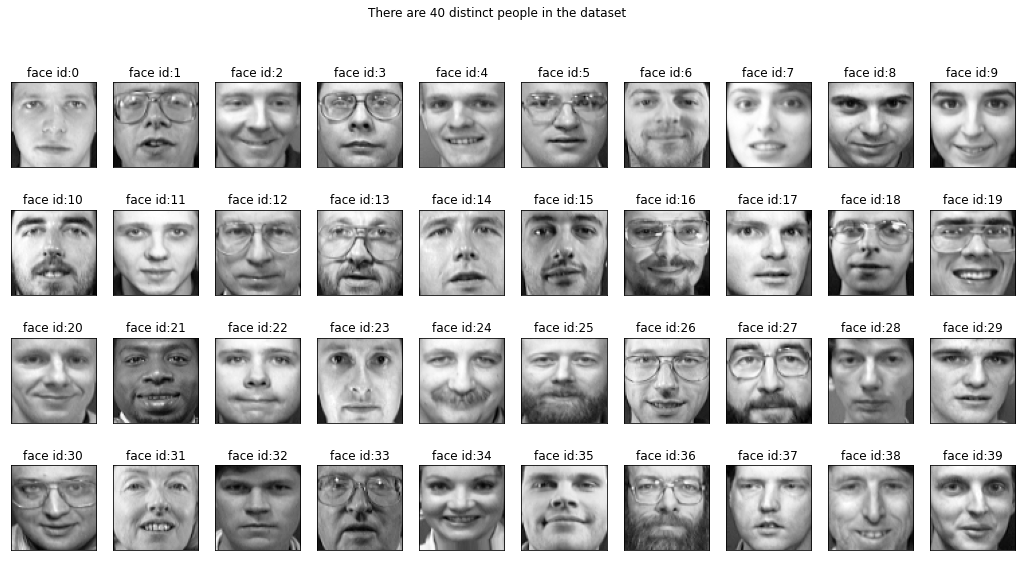

In [55]:
y = np.unique(target)
show_40_distinct_people(data, y)

### <div style="direction:rtl">  الف) نمونه‌گیری طبقه‌ای یک روش نمونه‌گیری است که خطای نمونه‌گیری را در مواردی که می‌توان جامعه را به زیر گروه‌ها تقسیم کرد، کاهش می‌دهد. نمونه‌گیری طبقه‌ای را با تقسیم جمعیت به زیرگروه‌های همگن به نام طبقات و سپس استفاده از نمونه‌گیری تصادفی ساده در هر زیرگروه انجام می‌دهیم             </div>

In [56]:
data.shape

(400, 64, 64)

In [57]:
target.shape

(400,)

In [59]:
#We reshape images for K-means
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
X.shape

(400, 4096)

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.6, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (160, 4096)
y_train shape:(160,)


In [71]:
X_test, X_val, y_test, y_val =train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=0)
print("X_test shape:",X_test.shape)
print("y_train shape:{}".format(y_test.shape))
print("X_val shape:",X_val.shape)
print("y_val shape:{}".format(y_val.shape))

X_test shape: (120, 4096)
y_train shape:(120,)
X_val shape: (120, 4096)
y_val shape:(120,)


In [72]:
kmeans_kwargs = {
    'init':'random',
    'n_init':10,
    'max_iter':300,
    'random_state':42
}
SSE = []
for k in range(1,40):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_val)
    SSE.append(kmeans.inertia_)

C:\Users\fateme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


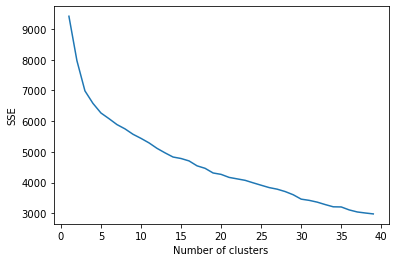

In [73]:
plt.plot(range(1, 40), SSE)
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 
plt.show()

In [164]:
kmeans = KMeans(n_clusters = 5).fit(X_train)
y_pred =kmeans.predict(X_test)
y_pred

array([2, 0, 4, 4, 4, 1, 1, 4, 1, 1, 2, 1, 2, 0, 0, 0, 4, 4, 4, 1, 2, 0,
       1, 1, 2, 3, 3, 0, 1, 4, 1, 2, 4, 2, 3, 0, 3, 2, 1, 0, 3, 2, 3, 4,
       1, 3, 4, 0, 1, 2, 0, 4, 3, 0, 4, 1, 4, 3, 2, 4, 4, 2, 1, 4, 4, 2,
       1, 3, 0, 3, 4, 2, 4, 2, 3, 3, 0, 1, 1, 4, 3, 2, 0, 0, 0, 4, 0, 3,
       3, 4, 4, 4, 4, 0, 1, 2, 0, 0, 2, 4, 2, 2, 1, 2, 1, 0, 3, 3, 4, 3,
       0, 0, 0, 0, 3, 3, 4, 3, 0, 3])

In [76]:
new = X_test.reshape(120,64,64)

In [165]:
first=[]
for i in range(0,120):
    if y_pred[i] == 0:
        first.append(new[i])
len(first)

26

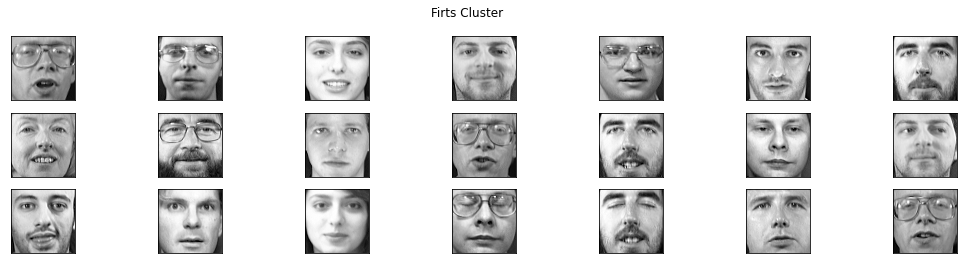

In [166]:
fig, axarr=plt.subplots(nrows=3, ncols=7, figsize=(18,4))
axarr=axarr.flatten()
for i in range(0,len(one)):
        image_index= i
        axarr[i].imshow(first[image_index], cmap='gray')
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        plt.suptitle("Firts Cluster")

In [167]:
second=[]
for i in range(0,120):
    if y_pred[i] == 1:
        second.append(new[i])
len(second)

21

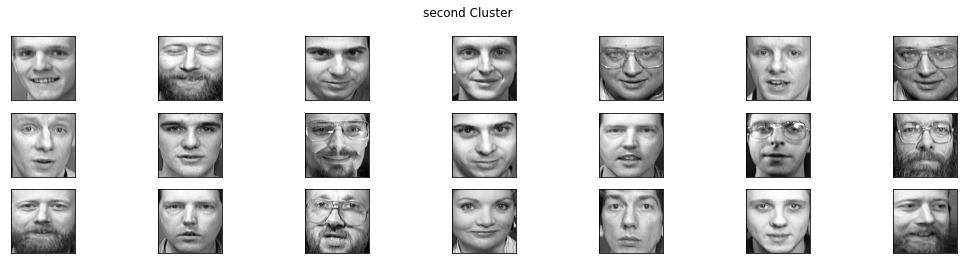

In [168]:
fig, axarr=plt.subplots(nrows=3, ncols=7, figsize=(18, 4))
axarr=axarr.flatten()
for i in range(0,len(second)):
        image_index= i
        axarr[i].imshow(second[image_index], cmap='gray')
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        plt.suptitle("second Cluster")

In [149]:
third=[]
for i in range(0,120):
    if y_pred[i] == 2:
        third.append(new[i])
len(third)

24

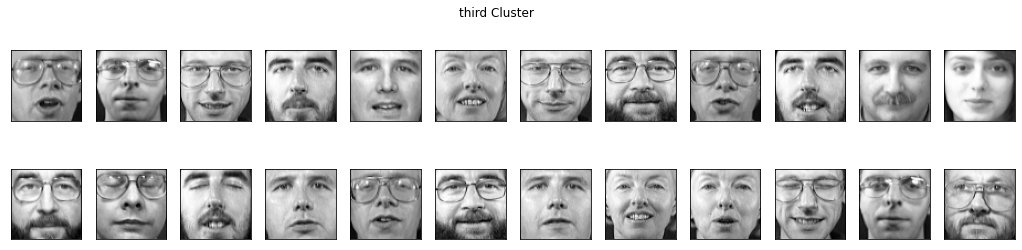

In [150]:
fig, axarr=plt.subplots(nrows=2, ncols=12, figsize=(18, 4))
axarr=axarr.flatten()
for i in range(0,len(third)):
        image_index= i
        axarr[i].imshow(third[image_index], cmap='gray')
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        plt.suptitle("third Cluster")

In [151]:
fourth=[]
for i in range(0,120):
    if y_pred[i] == 3:
        fourth.append(new[i])
len(fourth)

18

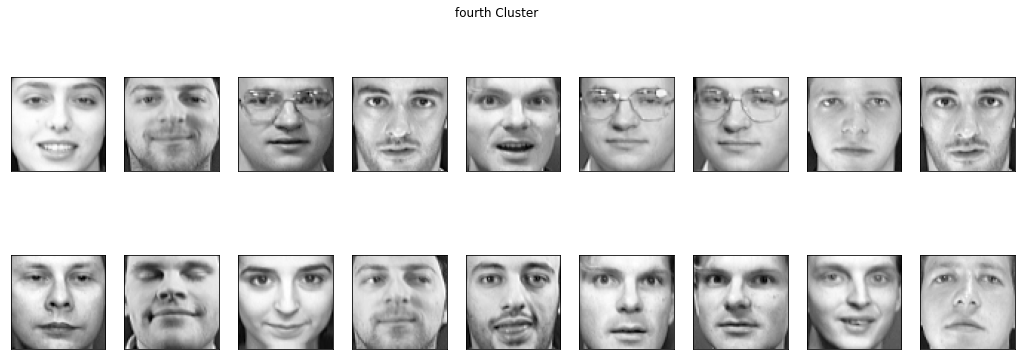

In [155]:
fig, axarr=plt.subplots(nrows=2, ncols=9, figsize=(18, 6))
axarr=axarr.flatten()
for i in range(0,len(fourth)):
        image_index= i
        axarr[i].imshow(fourth[image_index], cmap='gray')
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        plt.suptitle("fourth Cluster")

In [153]:
fifth=[]
for i in range(0,120):
    if y_pred[i] == 4:
        fifth.append(new[i])
len(fifth)

26

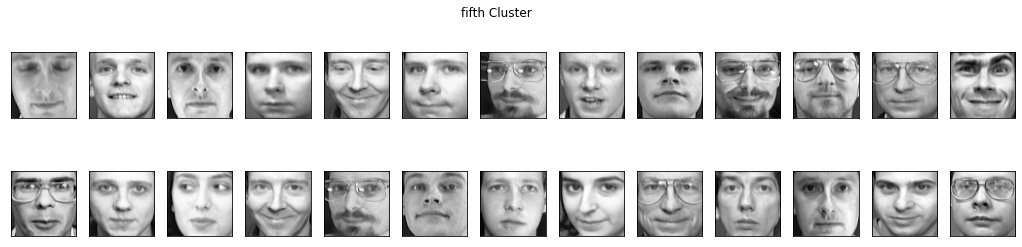

In [154]:
fig, axarr=plt.subplots(nrows=2, ncols=13, figsize=(18, 4))
axarr=axarr.flatten()
for i in range(0,len(fifth)):
        image_index= i
        axarr[i].imshow(fifth[image_index], cmap='gray')
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        plt.suptitle("fifth Cluster")

### <div style="direction:rtl">ج)با کمک ترکیب دو ویژگی زاویه صورت و میزان خنده هر شخص میتوان به چنین دسته بندی رسید</div>